In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/olympic100m.csv"

# Đọc file CSV với xử lý lỗi
df = pd.read_csv(file_name)

# Hiển thị 10 dòng đầu tiên
print(df.head(10))


   year  time
0  1896  12.0
1  1900  11.0
2  1904  11.0
3  1906  11.2
4  1908  10.8
5  1912  10.8
6  1920  10.8
7  1924  10.6
8  1928  10.8
9  1932  10.3


In [ ]:
df.tail()

,year,time
24,2000,9.87
25,2004,9.85
26,2008,9.69
27,2012,9.63
28,2016,9.81


In [ ]:
x = df['year']
x_train = np.array(x).reshape((-1,1))
x_train.shape

(29, 1)

In [ ]:
y_train = np.array(df['time'])
y_train.shape

(29,)

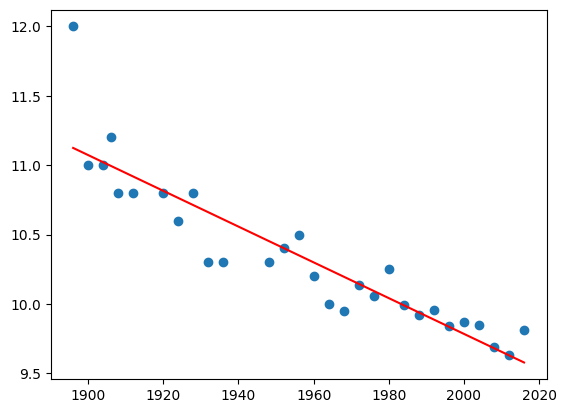

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
plt.show()

In [ ]:
# Dự đoán cho năm 2020
x_2020 = np.array([2020]).reshape(-1,1)
x_2020.shape

(1, 1)

In [ ]:
model.predict(x_2020)

array([9.52679525])

#scatter

Công thức toán học cho hàm chi phí (cost function) **Mean Squared Error (MSE)**. Đây là hàm chi phí phổ biến trong **hồi quy tuyến tính** để đánh giá mức độ sai lệch giữa giá trị dự đoán (mx_i + b\) và giá trị thực tế y_i.

Công thức toán học cho hàm chi phí (công thức **MSE**) là:


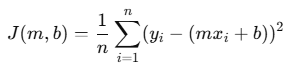

Trong đó:
-  J(m, b) : Hàm chi phí (Cost function) cần tối thiểu hóa.
- n: Số lượng điểm dữ liệu (số lượng giá trị trong tập dữ liệu).
- y_i: Giá trị thực tế của dữ liệu tại điểm thứ i.
- x_i: Giá trị đầu vào tại điểm thứ i.
- m: Hệ số góc của đường thẳng hồi quy (slope).
- b: Hệ số chệch của đường thẳng hồi quy (intercept).


In [ ]:
#Hàm chi phí
def cost_function(m, b, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i]-(m*x[i]+b))**2
    return totalError/float(len(x))

In [ ]:
# Thực hiện gradient descent
def gradient_descent(b, m, x, y, learning_rate, num_iterations):
    N = float(len(x))

    for j in range(num_iterations):
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
            m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)

        if j%100==0:
            print("MSE after " + str(j) + " iterations: " + str(cost_function(m, b, x, y)))
    return [b, m]

In [100]:
learning_rate = 0.0000001

initial_b = -2
initial_m = -5

num_iterations= 1000

x = df['year']
y= df['time']

print('Initial MSE:', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, num_iterations)
print('b:', b)
print('m:', m)
print('MSE:', cost_function(m, b, x, y))

Initial MSE: 95985230.0051862
MSE after 0 iterations: 5258008.192680159
MSE after 100 iterations: 0.559010712956903
MSE after 200 iterations: 0.5590107055783036
MSE after 300 iterations: 0.5590106981997042
MSE after 400 iterations: 0.5590106908211052
MSE after 500 iterations: 0.5590106834425057
MSE after 600 iterations: 0.5590106760639066
MSE after 700 iterations: 0.5590106686853076
MSE after 800 iterations: 0.5590106613067083
MSE after 900 iterations: 0.5590106539281094
b: -1.997439562736605
m: 0.00630030445737274
MSE: 0.5590106466232969


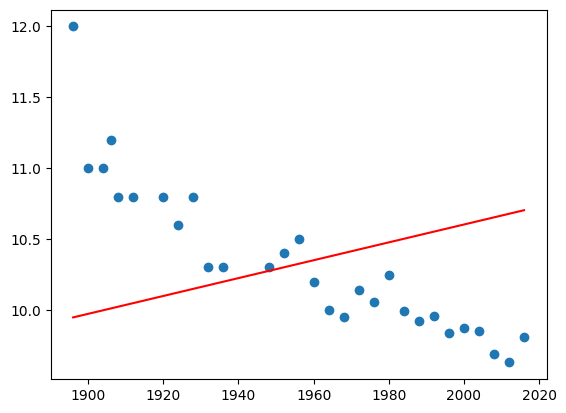

In [101]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='r')